In [ ]:
# from tensorflow import
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
img_path='demo_image.jpg'
img=tf.keras.utils.load_img(img_path,target_size=(224,224),color_mode='grayscale')
img_array=tf.keras.utils.img_to_array(img)

In [ ]:
img_array.shape

(224, 224, 1)

In [ ]:
img_batch=np.expand_dims(img_array,axis=0)
print(f'image batch shape: {img_batch.shape}')

image batch shape: (1, 224, 224, 1)


In [ ]:
conv_model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3),input_shape=(224,224,1))
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


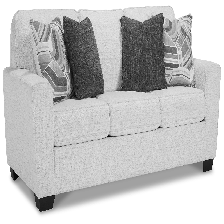

In [ ]:
img

In [ ]:
vertical_edge_filter=np.array([
    [[-1],[0],[1]],
    [[-1],[0],[1]],
    [[-1],[0],[1]]
],dtype='float32')

In [ ]:
vertic=vertical_edge_filter.reshape(3,3,1,1)

In [ ]:
vertic.shape

(3, 3, 1, 1)

In [ ]:
conv_model.layers[0].set_weights([vertic,np.array([0.0])])

In [ ]:
feature_map=conv_model.predict(img_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


In [ ]:
pool_model=tf.keras.models.Sequential([
    tf.keras.layers.MaxPool2D(pool_size=(2,2))
    ])

In [ ]:
pooled_map=pool_model.predict(feature_map)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


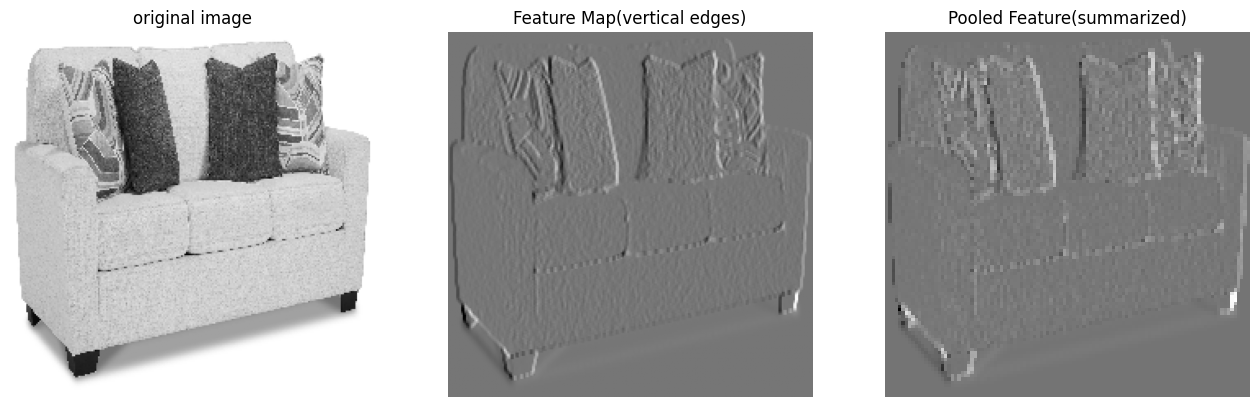

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.imshow(img_array,cmap='gray')
plt.title('original image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(feature_map[0,:,:,0],cmap='gray')
plt.title('Feature Map(vertical edges)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(pooled_map[0,:,:,0],cmap='gray')
plt.title('Pooled Feature(summarized)')
plt.axis('off')

plt.show()